<center>
    <img src="https://fael.edu.br/upload/cursos/interna/data-science-02-12-06-20-031446.png"  />
</center>

# Machine Learning: Model to predict Pollution Car Emmition

Anderson Cruz | London-UK | 
<a href="https://www.linkedin.com/in/anderjcruz/" target="_blank">Linkedin</a> | 
<a href="https://nowacapital.com" target="_blank">Nowa Capital</a>

### Project: Automotive Sector


The fuel consumption dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale.

Importing Needed packages


In [798]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Reading Data

In [799]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [800]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selected some features to explore more.


In [801]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244
5,3.5,6,10.0,11.9,7.7,230
6,3.5,6,10.1,11.8,8.1,232
7,3.7,6,11.1,12.8,9.0,255
8,3.7,6,11.6,13.4,9.5,267


We can plot each of these features:


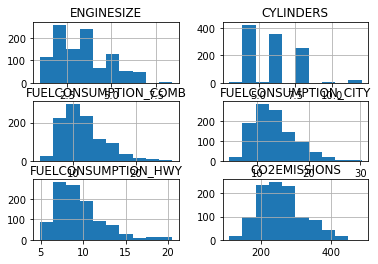

In [802]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','CO2EMISSIONS']]
viz.hist()
plt.show()

Plot each of these features against the Emission, to see how linear their relationship is:


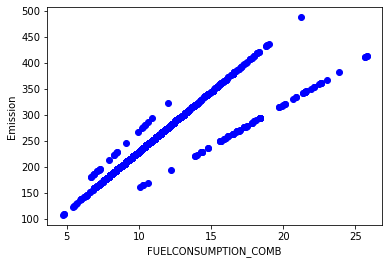

In [803]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

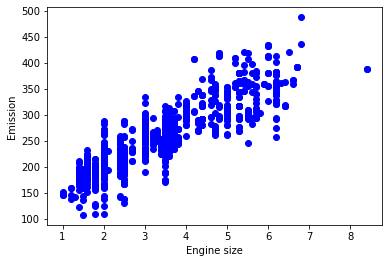

In [804]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Plot **CYLINDER** vs the **Emission**, to see how linear is their relationship is:


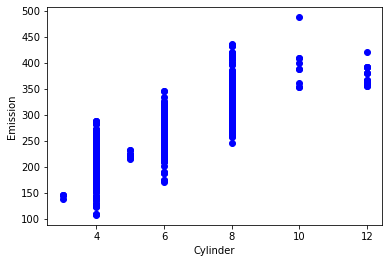

In [805]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Split the dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.


In [806]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Analyse: Simple Regression Model

1.**CYLINDER** vs the **Emission**, to see how linear is their relationship is:

Train data distribution


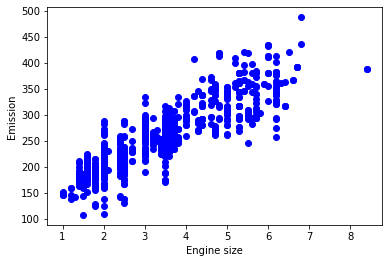

In [807]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Modeling

In [808]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.71021277]]
Intercept:  [125.87746754]


The **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


Plot outputs


Text(0, 0.5, 'Emission')

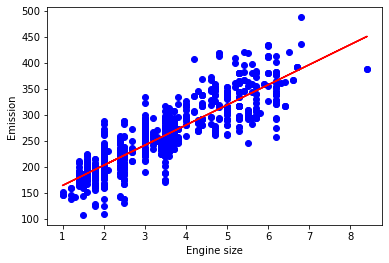

In [809]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

Model evaluation metrics using:

* Mean Absolute Error: is the mean of the absolute value of the errors.

* Mean Squared Error (MSE): is the mean of the squared error.

* Root Mean Squared Error (RMSE).

* R-squared:  metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line.


In [810]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

regr.fit(test_x, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[41.90159366]]
Intercept:  [120.65688145]


In [811]:
y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat))

Mean absolute error: 23.82
Residual sum of squares (MSE): 979.32
R2-score: 0.76


2.**FUELCONSUMPTION_COMB** vs the **Emission**, to see how linear is their relationship is:

In [812]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.1034887]]
Intercept:  [69.54610703]


In [813]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
regr.fit(test_x, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.87242987]]
Intercept:  [61.81441871]


In [814]:
y_hat = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat) )

Mean absolute error: 18.48
Residual sum of squares (MSE): 753.55
R2-score: 0.82


#### Analyse: Multiple Regression Model

1.**ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB** vs the **Emission**, to see how linear is their relationship is:

In [815]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[10.54795708  8.04947975  9.37708877]]
Intercept:  [65.21976507]


In [816]:
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
regr.fit (test_x, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[12.91716338  4.5397627  10.75788143]]
Intercept:  [64.54003016]


In [817]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat) )

Mean absolute error: 16.50
Residual sum of squares (MSE): 566.89
R2-score: 0.86


C:\Users\ander\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


2.**ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY** vs the **Emission**, to see how linear is their relationship is:

In [818]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[10.59190421  7.84754146  5.68096676  3.52042712]]
Intercept:  [65.93280189]


In [819]:
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
regr.fit (test_x, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[13.06081382  3.30307839  8.79337001  1.29764399]]
Intercept:  [66.86347503]


In [820]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat) )

Mean absolute error: 16.24
Residual sum of squares (MSE): 559.15
R2-score: 0.86


C:\Users\ander\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Analize: Polinomial Regression Model

1.**ENGINESIZE** vs the **Emission**, to see how is their relationship is:

Degree two

In [821]:
from sklearn.preprocessing import PolynomialFeatures
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         48.81945661 -1.34267109]]
Intercept:  [109.81470305]


In [822]:
from sklearn.preprocessing import PolynomialFeatures
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
test_x_poly = poly.fit_transform(test_x)

regr = linear_model.LinearRegression()
regr.fit(test_x_poly, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         56.16299243 -1.96046175]]
Intercept:  [98.45100774]


Text(0, 0.5, 'Emission')

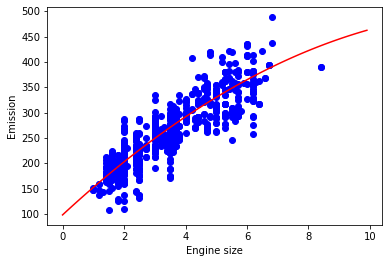

In [823]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

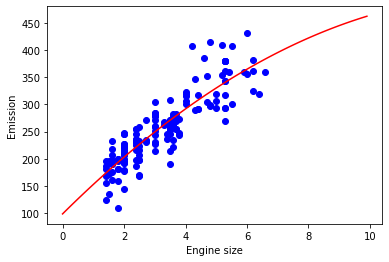

In [824]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [825]:
y_hat = regr.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat))

Mean absolute error: 23.97
Residual sum of squares (MSE): 966.55
R2-score: 0.76


2.**ENGINESIZE** vs the **Emission**, to see how is their relationship is:

Degree three (cubic)

In [826]:
from sklearn.preprocessing import PolynomialFeatures
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         30.44845771  3.70281438 -0.41687808]]
Intercept:  [129.36121907]


In [827]:
from sklearn.preprocessing import PolynomialFeatures
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
test_x_poly = poly.fit_transform(test_x)

regr = linear_model.LinearRegression()
regr.fit(test_x_poly, test_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         -6.3099147  16.35100986 -1.62767044]]
Intercept:  [161.76276756]


Text(0, 0.5, 'Emission')

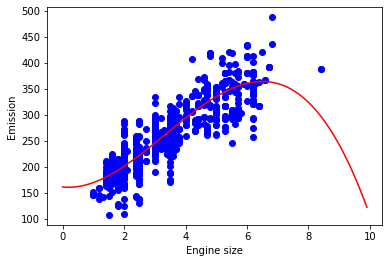

In [828]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2) + regr.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

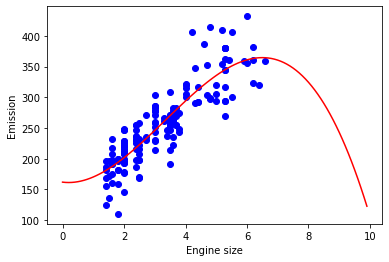

In [829]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2) + regr.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [830]:
y_hat = regr.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat))

Mean absolute error: 23.72
Residual sum of squares (MSE): 951.49
R2-score: 0.77


### Conclusions.